In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
P=pd.read_csv("3D Printer.csv")
P.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [3]:
P.isnull().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

In [4]:
pr=P.corr()
pr.style.background_gradient(cmap='Pastel1').set_precision(2)

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
layer_height,1.00,-0.19,0.00,0.00,0.00,-0.06,-0.00,0.80,0.34,0.51
wall_thickness,-0.19,1.00,0.10,-0.12,-0.03,-0.42,-0.03,-0.23,0.40,0.18
infill_density,0.00,0.10,1.00,0.24,-0.00,-0.09,0.00,0.12,0.36,0.16
nozzle_temperature,0.00,-0.12,0.24,1.00,0.60,-0.00,0.60,0.35,-0.41,-0.53
bed_temperature,0.00,-0.03,-0.00,0.60,1.00,0.00,1.00,0.19,-0.25,-0.30
print_speed,-0.06,-0.42,-0.09,-0.00,0.00,1.00,-0.00,0.12,-0.26,-0.23
fan_speed,-0.00,-0.03,0.00,0.60,1.00,-0.00,1.00,0.19,-0.25,-0.30
roughness,0.80,-0.23,0.12,0.35,0.19,0.12,0.19,1.00,0.05,0.10
tension_strenght,0.34,0.40,0.36,-0.41,-0.25,-0.26,-0.25,0.05,1.00,0.84
elongation,0.51,0.18,0.16,-0.53,-0.30,-0.23,-0.30,0.10,0.84,1.00


<AxesSubplot:>

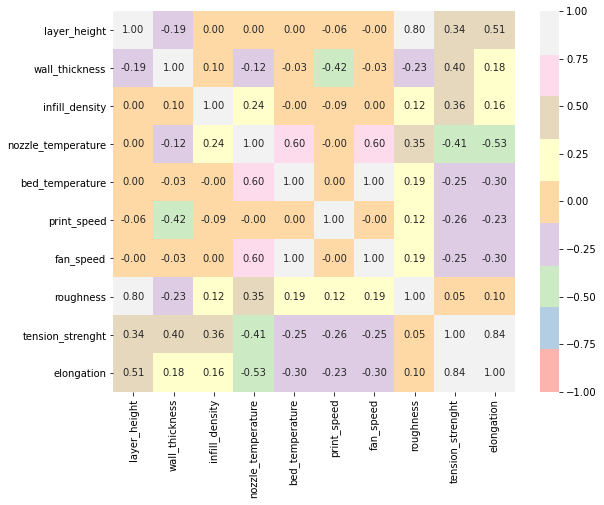

In [5]:
plt.figure(figsize=(9,7))
sns.heatmap(pr, cmap="Pastel1" , annot=True , annot_kws={'size': 10} , fmt='.2f' , center=0 , vmin=-1.0, vmax=+1.0)

In [6]:
P["infill_pattern"].value_counts()

honeycomb    25
grid         25
Name: infill_pattern, dtype: int64

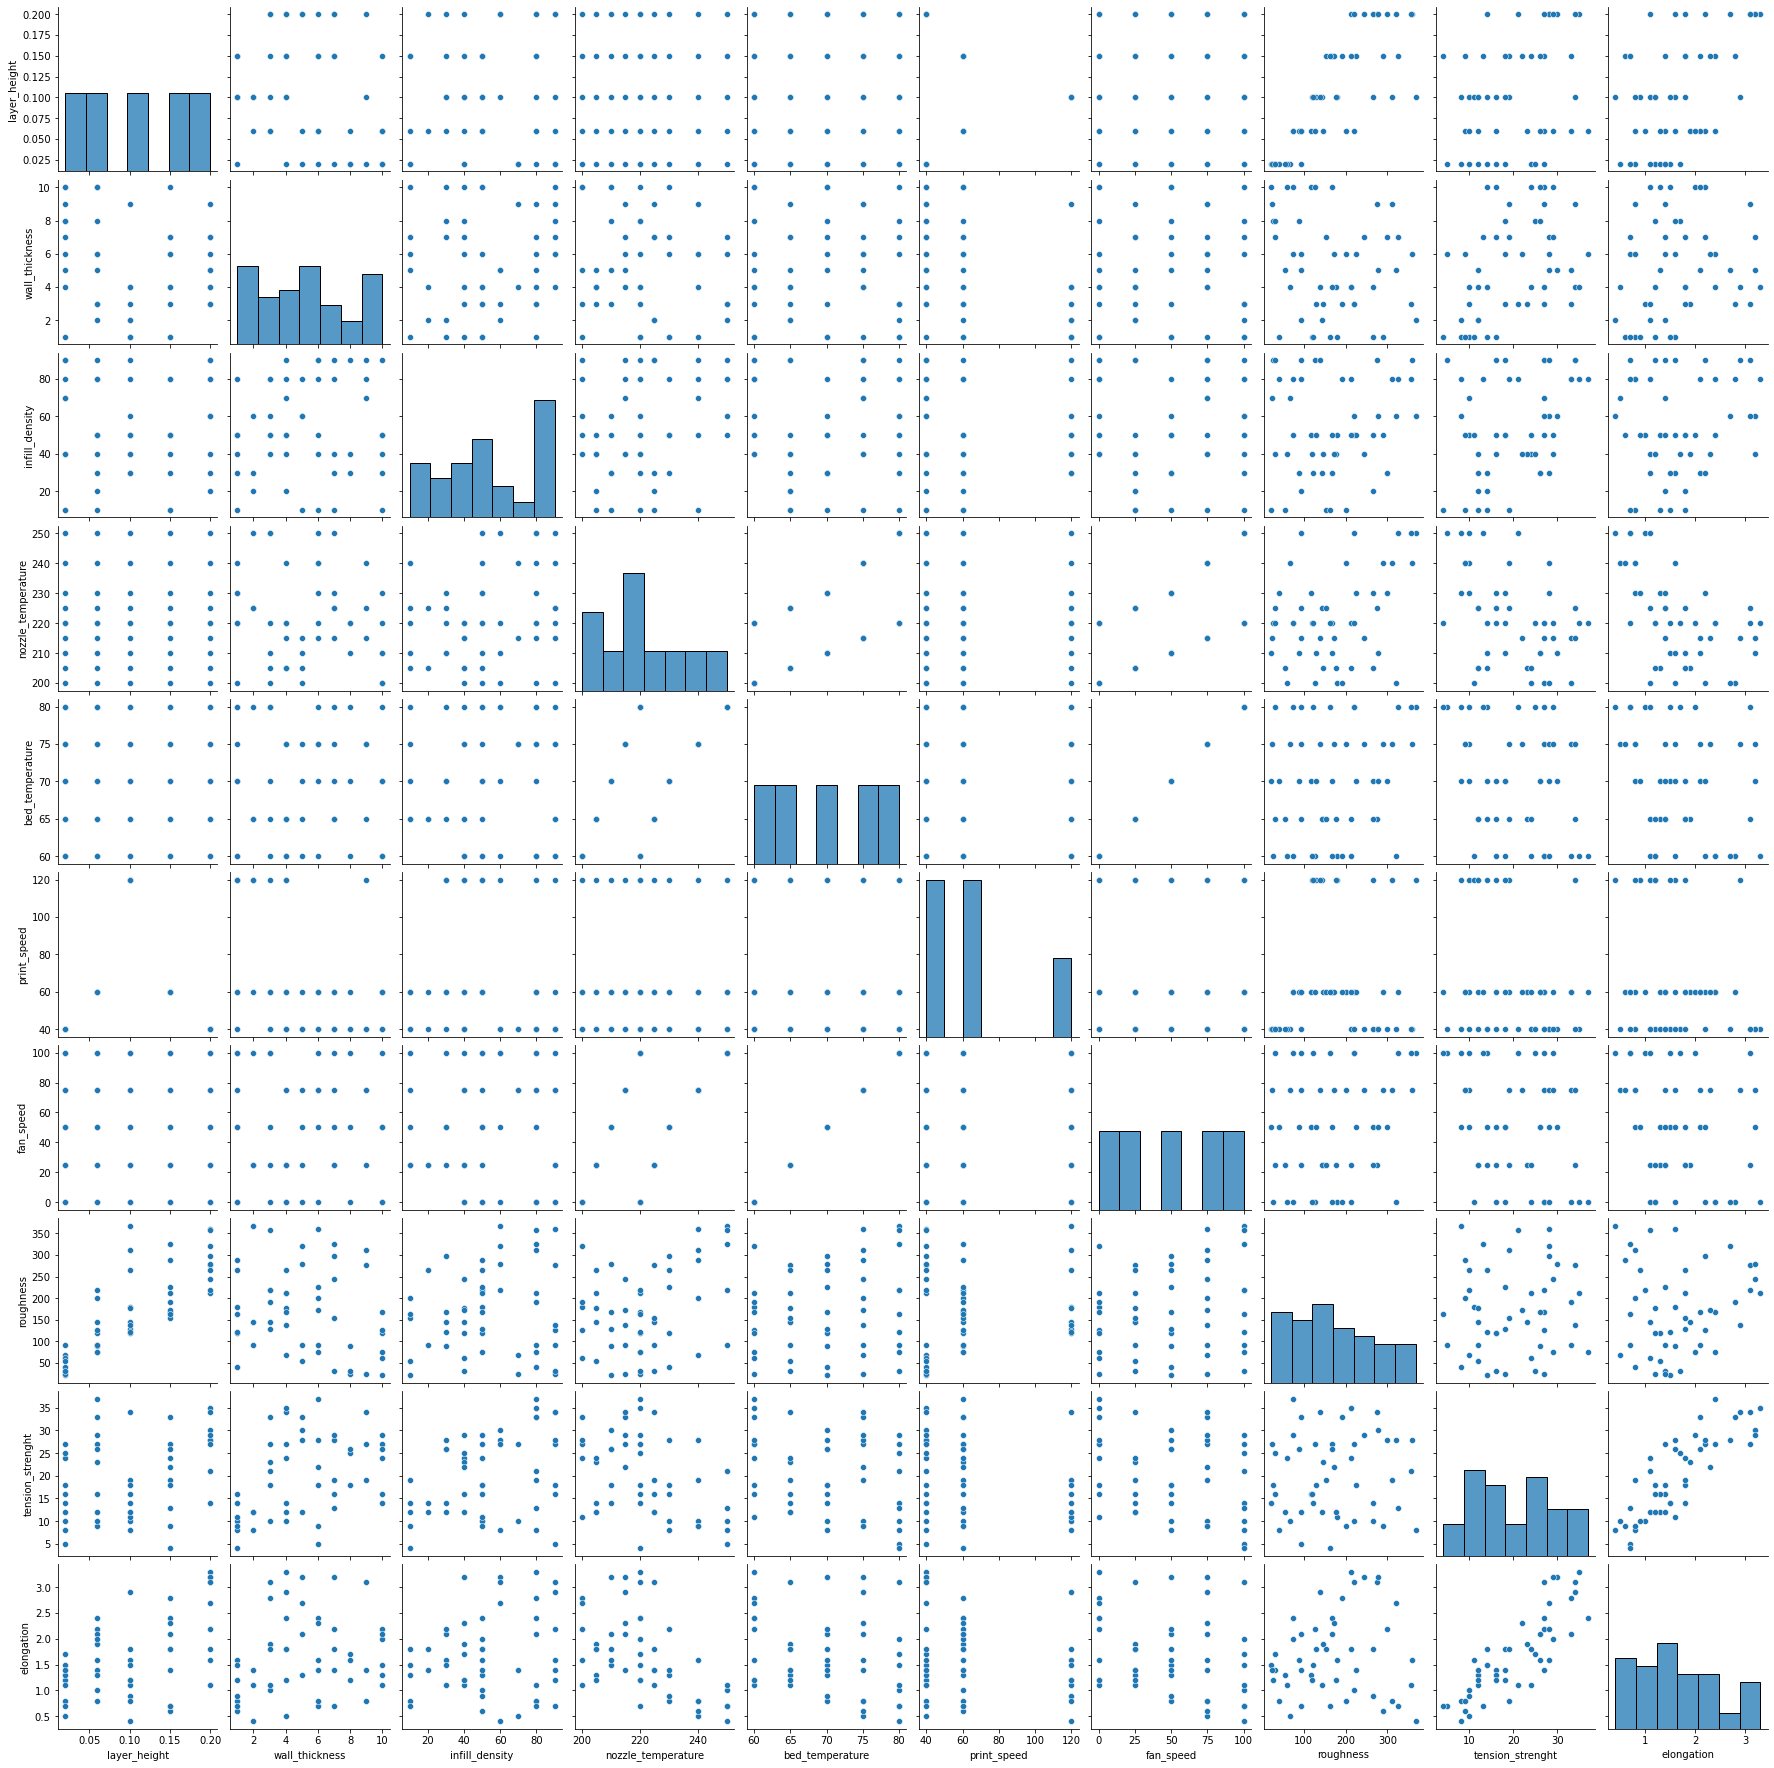

In [7]:
sns.pairplot(P)

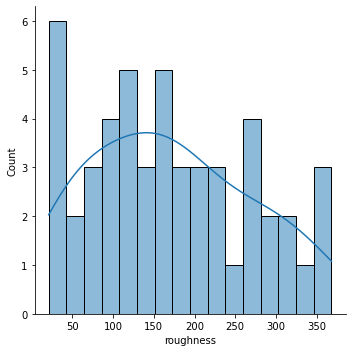

In [8]:
sns.displot(P["roughness"] , bins=16 , kde=True)

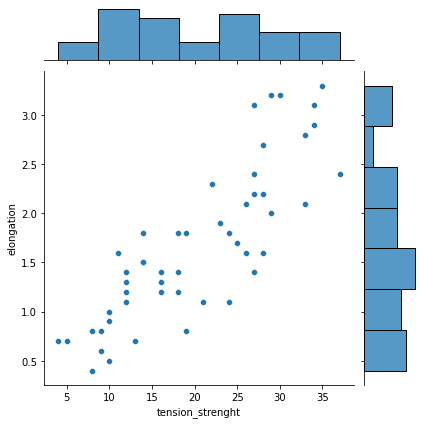

In [9]:
sns.jointplot(x="tension_strenght" , y="elongation" , data=P)

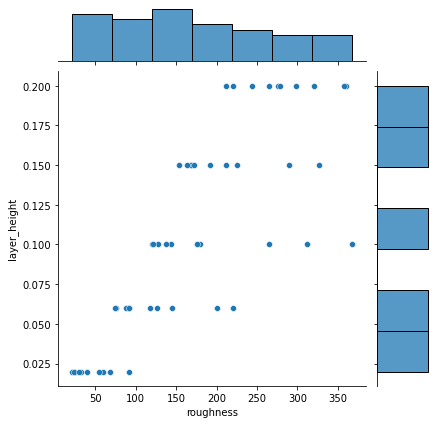

In [10]:
sns.jointplot(x="roughness" , y="layer_height" , data=P)

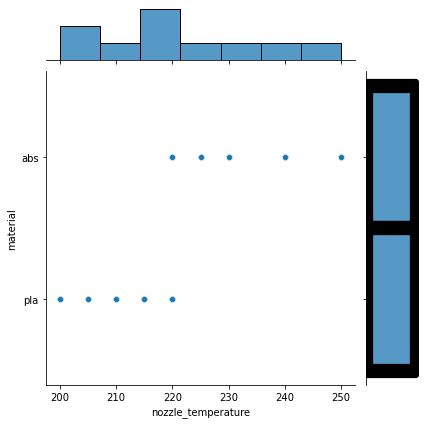

In [11]:
sns.jointplot(x="nozzle_temperature" , y="material" , data=P)

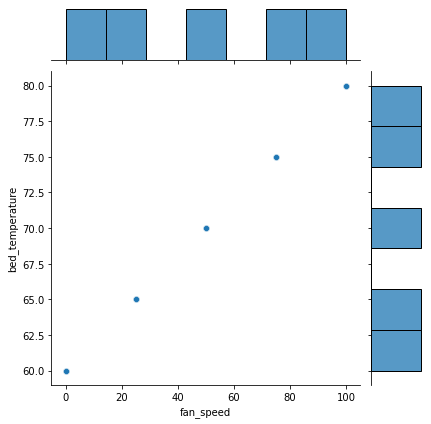

In [12]:
sns.jointplot(x="fan_speed" , y="bed_temperature" , data=P)

<AxesSubplot:xlabel='infill_pattern', ylabel='roughness'>

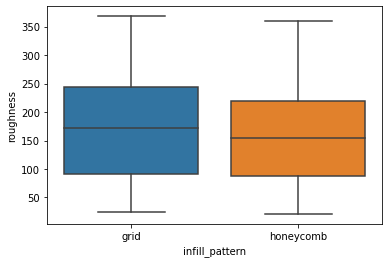

In [13]:
sns.boxplot(x="infill_pattern" , y="roughness" , data=P)

<AxesSubplot:xlabel='nozzle_temperature', ylabel='material'>

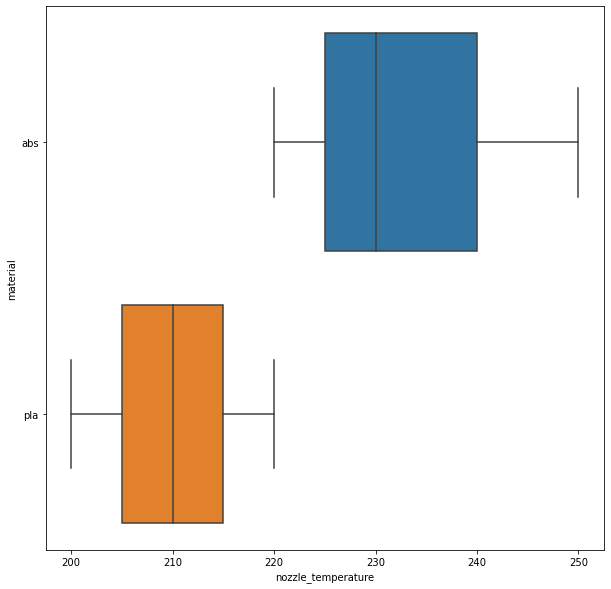

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(x="nozzle_temperature" , y="material" , data=P)

<AxesSubplot:xlabel='tension_strenght', ylabel='elongation'>

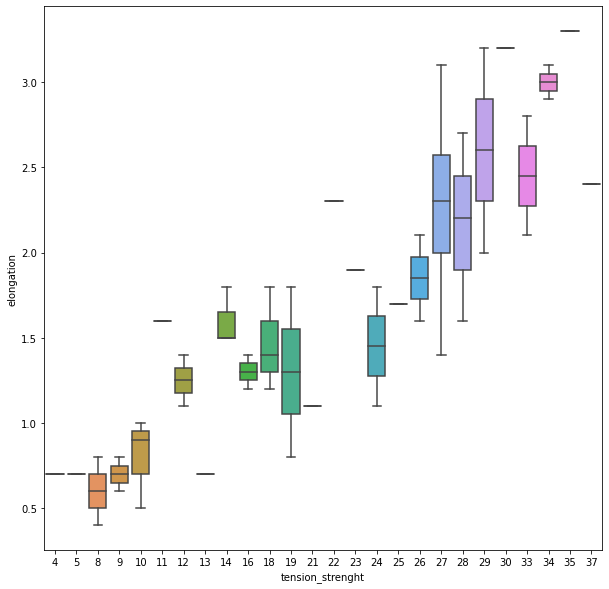

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x="tension_strenght" , y="elongation" , data=P)

In [16]:
P.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,0.106000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,1.672000
std,0.064397,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,0.788188
min,0.020000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,0.400000
25%,0.060000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,1.100000
50%,0.100000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,1.550000
75%,0.150000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,2.175000
max,0.200000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,3.300000


In [17]:
P.duplicated().sum()

0

In [18]:
P[P['elongation'] >= P['elongation'].mean()]

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7
10,0.06,6,80,grid,220,60,60,abs,0,75,37,2.4
15,0.06,10,90,honeycomb,200,60,60,pla,0,126,27,2.2
16,0.06,3,40,grid,205,65,60,pla,25,145,23,1.9
18,0.06,5,80,grid,215,75,60,pla,75,92,33,2.1
19,0.06,10,50,honeycomb,220,80,60,pla,100,74,29,2.0
27,0.10,3,50,honeycomb,210,70,120,pla,50,128,18,1.8
28,0.10,4,90,grid,215,75,120,pla,75,138,34,2.9
30,0.15,4,50,grid,220,60,60,abs,0,168,27,2.4
31,0.15,7,10,honeycomb,225,65,60,abs,25,154,19,1.8


In [19]:
P.pivot_table(values='tension_strenght', index='elongation', columns='bed_temperature', aggfunc='count')

bed_temperature,60,65,70,75,80
elongation,,,,,
0.4,NaN,NaN,NaN,NaN,1.0
0.5,NaN,NaN,NaN,1.0,NaN
0.6,NaN,NaN,NaN,1.0,NaN
0.7,NaN,NaN,NaN,NaN,3.0
0.8,NaN,NaN,1.0,2.0,NaN
0.9,NaN,NaN,1.0,NaN,NaN
1.0,NaN,NaN,NaN,NaN,1.0
1.1,1.0,1.0,NaN,NaN,1.0
1.2,2.0,1.0,NaN,NaN,NaN


In [20]:
P.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [21]:
P1=pd.read_csv("3D Printer.csv")
P1.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [22]:
Grid=[1 if each=='grid' else 0 for each in P1.infill_pattern]
Honeycomb=[1 if each=='honeycomb' else 0 for each in P1.infill_pattern]
ABS=[1 if each == 'abs' else 0 for each in P1.material]
PLA=[1 if each =='pla' else 0 for each in P1.material]

In [23]:
P1['Pattern_grid']=Grid
P1['Pattern_honeycomb']=Honeycomb
P1['Mtrl_abs']=ABS
P1['Mtrl_pla']=PLA
P1.drop(['infill_pattern','material'], axis=1, inplace=True)
P1.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,Pattern_grid,Pattern_honeycomb,Mtrl_abs,Mtrl_pla
0,0.02,8,90,220,60,40,0,25,18,1.2,1,0,1,0
1,0.02,7,90,225,65,40,25,32,16,1.4,0,1,1,0
2,0.02,1,80,230,70,40,50,40,8,0.8,1,0,1,0
3,0.02,4,70,240,75,40,75,68,10,0.5,0,1,1,0
4,0.02,6,90,250,80,40,100,92,5,0.7,1,0,1,0


In [24]:
Pcorr=P1.corr()
Pcorr

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,Pattern_grid,Pattern_honeycomb,Mtrl_abs,Mtrl_pla
layer_height,1.000000e+00,-0.192571,3.498560e-03,8.332953e-16,1.024570e-15,-5.550085e-02,-1.103383e-16,0.801341,0.338230,0.507583,1.175539e-16,-4.353849e-18,-1.306155e-16,8.707699e-17
wall_thickness,-1.925714e-01,1.000000,1.025762e-01,-1.184929e-01,-2.932662e-02,-4.195307e-01,-2.932662e-02,-0.226987,0.399849,0.176364,-1.451594e-01,1.451594e-01,-1.175100e-01,1.175100e-01
infill_density,3.498560e-03,0.102576,1.000000e+00,2.386137e-01,-2.337202e-16,-9.430408e-02,3.841975e-17,0.118389,0.358464,0.159009,1.672736e-01,-1.672736e-01,2.628585e-01,-2.628585e-01
nozzle_temperature,8.332953e-16,-0.118493,2.386137e-01,1.000000e+00,6.024534e-01,-5.901839e-16,6.024534e-01,0.348611,-0.405908,-0.527447,1.703995e-01,-1.703995e-01,7.838379e-01,-7.838379e-01
bed_temperature,1.024570e-15,-0.029327,-2.337202e-16,6.024534e-01,1.000000e+00,9.681476e-16,1.000000e+00,0.192142,-0.252883,-0.300871,-5.024296e-18,2.009718e-17,-1.457046e-16,1.406803e-16
print_speed,-5.550085e-02,-0.419531,-9.430408e-02,-5.901839e-16,9.681476e-16,1.000000e+00,-1.312743e-17,0.121066,-0.264590,-0.234052,-5.318094e-17,7.251946e-18,-3.384242e-17,-3.867705e-17
fan_speed,-1.103383e-16,-0.029327,3.841975e-17,6.024534e-01,1.000000e+00,-1.312743e-17,1.000000e+00,0.192142,-0.252883,-0.300871,1.607775e-17,-4.019437e-18,4.019437e-18,4.019437e-18
roughness,8.013409e-01,-0.226987,1.183890e-01,3.486108e-01,1.921416e-01,1.210657e-01,1.921416e-01,1.000000,0.051617,0.098962,6.834030e-02,-6.834030e-02,2.331730e-01,-2.331730e-01
tension_strenght,3.382296e-01,0.399849,3.584644e-01,-4.059076e-01,-2.528832e-01,-2.645905e-01,-2.528832e-01,0.051617,1.000000,0.838109,-9.053946e-03,9.053946e-03,-2.897263e-01,2.897263e-01
elongation,5.075830e-01,0.176364,1.590088e-01,-5.274466e-01,-3.008708e-01,-2.340521e-01,-3.008708e-01,0.098962,0.838109,1.000000,-4.613808e-02,4.613808e-02,-3.947369e-01,3.947369e-01


<AxesSubplot:>

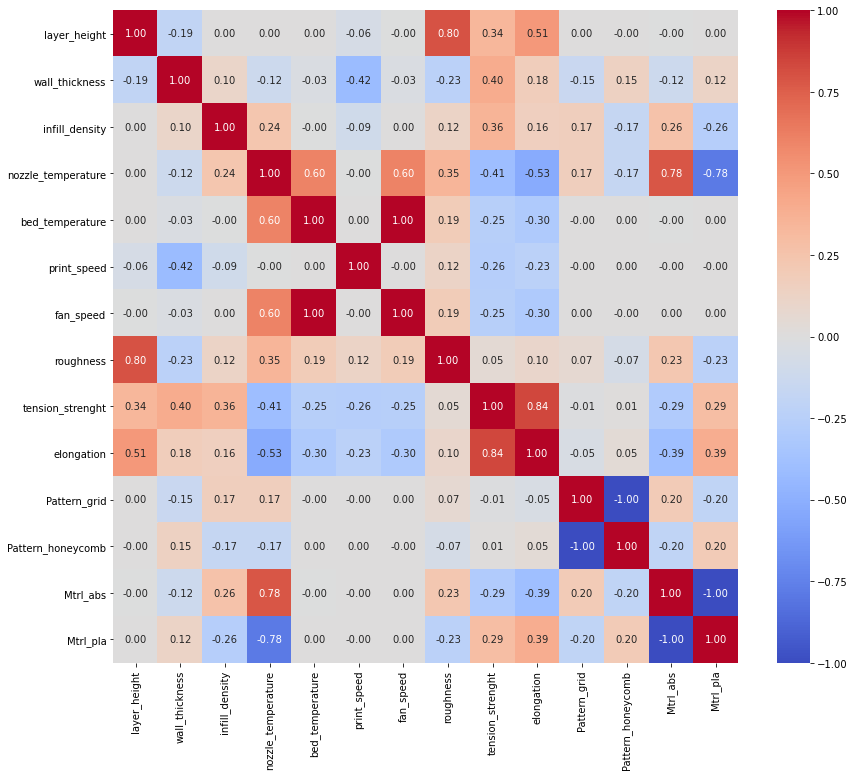

In [25]:
plt.figure(figsize=(14,12))
sns.heatmap(Pcorr, cmap='coolwarm' , vmin=-1.0, vmax=+1.0, center=0, annot=True, fmt='.2f')